## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
pd.options.mode.chained_assignment = None

## Univariate case

In [2]:
uni = pd.read_csv(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Regression\UnivariateData\30.csv")

In [3]:
uni.columns = ['Independent','Dependent']
uni

,Independent,Dependent
0,0.953,1.9991
1,0.056,2.7593
2,0.278,2.1659
3,0.620,2.1595
4,0.834,2.0021
...,...,...
995,0.507,1.9702
996,0.085,2.6445
997,0.143,2.2779
998,0.803,1.9213


## Plotting the original values

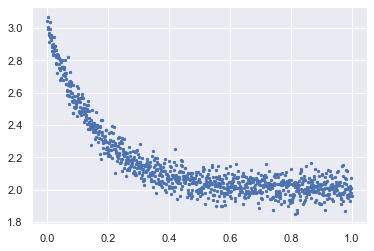

In [4]:
sns.set()
plt.scatter(uni['Independent'],uni['Dependent'], s = 5.4)

## Divide data into train and test

In [5]:
#shuffle the data
uni = uni.sample(frac=1)

x = np.array(uni.Independent)
y = np.array(uni.Dependent)


train_x = x[:601]
test_x = x[601:]

train_y = y[:601]
test_y = y[601:]

## Defining a function to train the neuron

In [6]:

def train_neuron(data, label):
    samples, features = data.shape
    data = np.hstack((np.ones((samples,1)),data)).reshape((-1,features+1))
    label = label.reshape((-1,1))
    weights = np.random.rand(features+1).reshape((-1,1))
    epoch_error = []
    epoch = 0
    while epoch<10000:
        epoch +=1
        data_input = data
        in_neuron = np.dot(data_input,weights)
        out_neuron = in_neuron
        
        error = label-out_neuron
        sqr_error = error**2
        avg_error = sqr_error.sum()
        epoch_error.append((epoch,avg_error/(2*samples)))
        
        deriv = error*(-2/samples)
        
        inputs = data_input.T
        final_derivative = np.dot(inputs,deriv)
        
        weights = weights-0.4*final_derivative
    
    return weights, epoch_error
        
    

## Define a function to predict

In [7]:
def predict(W,x):
    W = W.reshape((-1,1))
    return (np.dot(x,W[1:])+W[0])

In [8]:
weight, err_epoch = train_neuron(train_x.reshape((-1,1)),train_y.reshape((-1,1)))

### Plot the data points with the best fit line predicted

Text(0, 0.5, 'Dependent')

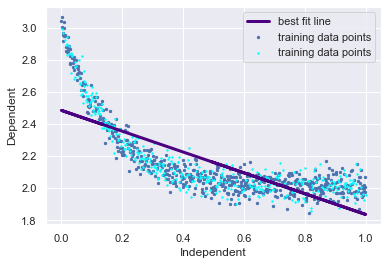

In [9]:
sns.set()
plt.scatter(train_x,train_y, s = 5.4, label="training data points")
plt.plot(train_x.ravel(),predict(weight,train_x.reshape((-1,1))).ravel(),color = "indigo",linewidth = 3,label="best fit line")
plt.scatter(test_x,test_y,s = 5.4, marker="1", color = "cyan",label = "training data points")
plt.legend()
plt.xlabel("Independent")
plt.ylabel("Dependent")

## plot epoch vs mean square error

Text(0, 0.5, 'Error')

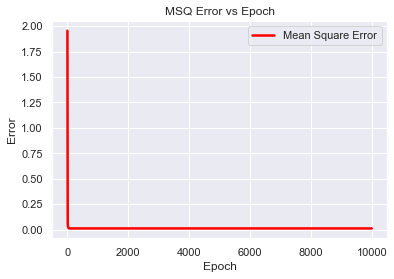

In [10]:
plt.plot(*zip(*err_epoch[::10]), color = "red",linewidth = 2.5,label="Mean Square Error")
plt.legend()
plt.title("MSQ Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Error")

## Finding mean squared error for the train and test cases

In [11]:
## Training

train_x_pred = predict(weight,train_x.reshape((-1,1)))
error_train = train_y-train_x_pred
sq_er_train = error_train**2
msq_er_train = sq_er_train.sum()/(2*train_x.shape[0])


# Testing
test_x_pred = predict(weight,test_x.reshape((-1,1)))
error_test = test_y-test_x_pred
sq_er_test = error_test**2
msq_er_test = sq_er_test.sum()/(2*test_x.shape[0])

In [12]:
from tabulate import tabulate

table = [["Data","Mean Square Error"],["-----","------------------"],["Train",msq_er_train],["Test",msq_er_test]]
print(tabulate(table))

-----  ------------------
Data   Mean Square Error
-----  ------------------
Train  27.31237104813594
Test   18.8891677105854
-----  ------------------


## For bivariate data

In [13]:
bivar = pd.read_csv(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Regression\BivariateData\30.csv")
bivar.columns = ['Independent1','Independent2','Dependent']

In [14]:
bivar

,Independent1,Independent2,Dependent
0,0.33,0.26,7.9469
1,0.92,0.70,7.2077
2,0.10,0.64,6.9303
3,0.13,0.05,4.9484
4,0.25,0.22,6.8218
...,...,...,...
10195,0.14,0.75,7.6303
10196,0.76,0.01,5.9899
10197,0.56,0.63,10.3950
10198,0.15,0.42,6.4733


## Plotting the data in 3d

Text(0.5, 0, '$Dependent$')

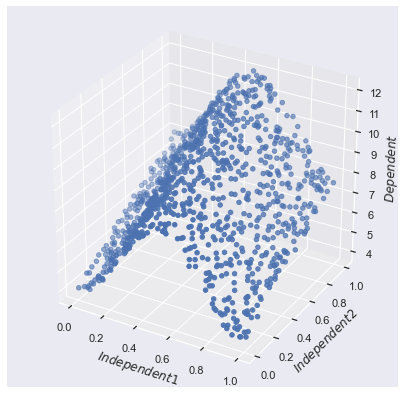

In [15]:
#%matplotlib notebook
from mpl_toolkits import mplot3d
x = np.array(bivar.Independent1)
y = np.array(bivar.Independent2)
z = np.array(bivar.Dependent)

fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(x[::10],y[::10],z[::10])
ax.set_xlabel("$Independent 1$")
ax.set_ylabel("$Independent 2$")
ax.set_zlabel("$Dependent$")


## Divide Data into train and test

In [16]:
#shuffle the data
bivar = bivar.sample(frac=1)

x = np.array(bivar[['Independent1','Independent2']])
y = np.array(bivar.Dependent)


train_x = x[:6001]
test_x = x[6001:]

train_y = y[:6001]
test_y = y[6001:]

In [17]:
weight_bi, err_epoch_bi = train_neuron(train_x.reshape((-1,2)),train_y.reshape((-1,1)))

## Plotting the data and line

In [18]:
x1 = train_x.reshape((-1,2))
y1  = train_y.reshape((-1,1))

x2 = test_x.reshape((-1,2))
y2  = test_y.reshape((-1,1))

z = predict(weight_bi,x1.reshape((-1,2)))

<IPython.core.display.Javascript object>


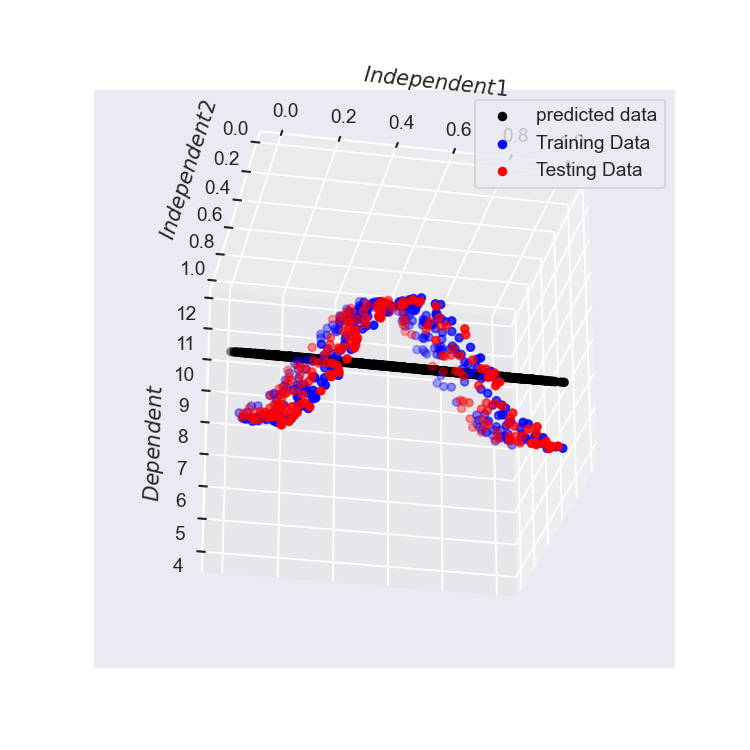

In [19]:
%matplotlib notebook
fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(*zip(*x1[::5]),z[::5],color="black",label = "predicted data")
ax.set_xlabel("$Independent 1$")
ax.set_ylabel("$Independent 2$")
ax.set_zlabel("$Dependent$")


ax.scatter3D(*zip(*x1[::20]),y1[::20], label="Training Data", color = "blue")
ax.set_xlabel("$Independent 1$")
ax.set_ylabel("$Independent 2$")
ax.set_zlabel("$Dependent$")
plt.legend()

ax.scatter3D(*zip(*x2[::20]),y2[::20], label="Testing Data", color = "red")
ax.set_xlabel("$Independent 1$")
ax.set_ylabel("$Independent 2$")
ax.set_zlabel("$Dependent$")
plt.legend()

## Finding the meansquare errors

In [20]:
## Training

train_x_pred = predict(weight_bi,train_x.reshape((-1,2)))
error_train = train_y-train_x_pred
sq_er_train = error_train**2
msq_er_train = sq_er_train.sum()/(2*train_x.shape[0])


# Testing
test_x_pred = predict(weight_bi,test_x.reshape((-1,2)))
error_test = test_y-test_x_pred
sq_er_test = error_test**2
msq_er_test = sq_er_test.sum()/(2*test_x.shape[0])

In [21]:

table = [["Data","Mean Square Error"],["-----","------------------"],["Train",msq_er_train],["Test",msq_er_test]]
print(tabulate(table))

-----  ------------------
Data   Mean Square Error
-----  ------------------
Train  14464.84623414174
Test   9940.422014254667
-----  ------------------
